<a href="https://colab.research.google.com/github/VVKate/Neural_University_HomeWorks/blob/main/15_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнеее задание: Июльский курс (2020). Pro. Занятие 15
##Введение в генетические алгоритмы
##Верхошинская Катерина Викторовна

## **LIGHT**

### **Задание:**

1. С помощью генетического алгоритма найдите точку, где функция от трёх переменных: f = x^2/y + z*(12-z) + 5*y/x  равна 0 (символ ^2 -возведение в квадрат). Интервал изменения каждой переменной x, y, z и вывести на экран значение этой точки и значение функции в ней
2. Проведите анализ скорости сходимости до заданной вами точности (выберите точность, близкую к минимуму в прошлом примере) и заполните таблицу - какими были параметры и за сколько эпох алгоритм дошёл до нужной точности
 1. Выберите три разные размера популяции
 2. Выберите три разные коэффициента мутации
 3. Выберите три разных количества выживших
3. Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределение грузов по поездам:
  1. Поезда - 1, 12, 72, 4, 55, 1
  2. Грузы - 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8
4. Решите задачу расстановки грузов по поездам с дополнительным условием - надо заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):
  1. Поезда - 10, 10, 10, 12, 12, 12
  2. Грузы - 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
class General_Class_GA():
    def __init__(self, n, l, split=0.2, reverse=False, dtype=np.float32):
        """
        n: число ботов (размер популяции)
        l: размерность бота
        split: доля популяции, переходящая в новое поколение
        reverse: флаг True - ищем максимум функции потерь
        dtype: тип данных бота (float, int)
        """
        self.n = n
        self.l = l
        self.dtype = dtype
        self.nsurv = int(n*split)
        self.popul = np.zeros((self.n, self.l), dtype=dtype)
        self.best = np.zeros((self.nsurv, self.l), dtype=dtype)
        self.val = np.zeros(n)
        self.reverse = reverse

    def selectBest(self):
        for i in range(self.n):
            self.val[i] = self.loss(self.popul[i])
        idx = sorted([i for i in range(self.n)], key=lambda i: self.val[i])
        self.best = self.popul[idx[:self.nsurv]].copy() 
        self.popul[:self.nsurv] = self.best
        for i in range(self.nsurv):
            self.val[i] = self.loss(self.popul[i])
        return 

    def newGeneration(self):
        for i in range(self.nsurv, self.n):
            i1, i2 = np.random.choice(self.nsurv, 2, replace=False) # выбрали 2-х родителей
            self.child(i, i1, i2)
            self.val[i] = self.loss(self.popul[i])
        return

    def mutation(self):
        return

    def evolution(self):
        self.selectBest()
        self.newGeneration()
        self.mutation()

    def child(self, i, i1, i2):
        for j in range(self.l):
            self.popul[i, j] = self.popul[i1, j] if np.random.rand() < 0.5 else self.popul[i2, j]
        return

    def loss(self, bot):
        return 0.0

#### Задача №1

С помощью генетического алгоритма найдите точку, где функция от трёх переменных: f = x^2/y + z(12-z) + 5y/x равна 0 (символ ^2 -возведение в квадрат). Интервал изменения каждой переменной x, y, z и вывести на экран значение этой точки и значение функции в ней


In [ ]:
class First_task_class_GA(General_Class_GA):
    """
    n: - размер популяции
    l: - размерность ботов
    split: - доля ботов переходящаяя в следующее поколений (0. - 1.)
    eps: - вероятность мутации
    k: - интенсивность мутации
    """
    def __init__(self, n, l, split=0.2, eps=0.1, k=0.1):
        self.a = np.array([1, 5, 10, 30, 0,0,0,0, 0,0,0,0], np.float32).T
        self.b = np.array([0,0,0,0, 1, 5, 10, 30, 0,0,0,0], np.float32).T
        self.c = np.array([0,0,0,0, 0,0,0,0, 1, 5, 10, 30], np.float32).T
        super(First_task_class_GA, self).__init__(n, l, split)
        self.popul = np.random.normal(0, 1, (n, l))
        self.eps = eps
        self.k = k

    def mutation(self):
        for i in range(self.nsurv, self.n):
            if np.random.random() < self.eps:
                self.popul[i] += self.k*np.random.normal(0, 1, self.l)

    def loss(self, bot):
        return abs(self.func(*self.xyz(bot)))

    def xyz(self, bot):
        x = np.dot(bot, self.a)
        y = np.dot(bot, self.b)
        z = np.dot(bot, self.c)
        return (x, y, z)

    def func(self, x, y, z):
        return x**2/y + z*(12-z) + 5*y/x

Сделаем 100 попыток, с разными начальными инициализациями
Визуализируем полученный результат (выведем на экран значение точки и значение функции в ней, для каждой их попыток. Также выведем количество эпох на каждую попытку)

In [ ]:
%%time
accuracy = 0.01
for seed in range(100):
    np.random.seed(seed)
    ga = First_task_class_GA(100, 12, eps=0.3, k=1.)
    for ep in range(1000):
        ga.evolution()
        if ga.val[0] < accuracy:
            break
    if ga.val[0] < accuracy:
        print("seed=%d x=%.3f, y=%.3f z=%.3f f=%6f epochs:%d" % (seed, (*ga.xyz(ga.popul[0])+(ga.val[0],)), ep))

seed=0 x=22.361, y=-39.012 z=2.198 f=0.005105 epochs:8
seed=1 x=-59.508, y=40.877 z=16.918 f=0.009286 epochs:72
seed=2 x=29.874, y=-69.103 z=9.395 f=0.007191 epochs:315
seed=3 x=-11.628, y=23.242 z=0.358 f=0.008987 epochs:472
seed=5 x=-40.685, y=-88.970 z=11.323 f=0.000900 epochs:997
seed=6 x=23.027, y=-62.170 z=2.262 f=0.000493 epochs:10
seed=7 x=15.767, y=-29.522 z=10.267 f=0.009804 epochs:25
seed=8 x=26.104, y=-52.758 z=9.602 f=0.004318 epochs:548
seed=11 x=3.776, y=-26.715 z=5.700 f=0.005936 epochs:8
seed=13 x=-26.684, y=-35.231 z=1.268 f=0.004324 epochs:183
seed=14 x=32.660, y=-60.050 z=9.008 f=0.002985 epochs:498
seed=15 x=7.150, y=-33.185 z=9.354 f=0.001185 epochs:54
seed=16 x=-42.824, y=-103.821 z=0.480 f=0.009634 epochs:1
seed=17 x=21.757, y=-39.344 z=2.135 f=0.009124 epochs:14
seed=18 x=20.813, y=-66.806 z=9.669 f=0.003328 epochs:7
seed=19 x=-0.578, y=2.328 z=1.998 f=0.008719 epochs:9
seed=20 x=-6.930, y=32.575 z=2.262 f=0.003152 epochs:248
seed=21 x=6.209, y=-28.701 z=2.602 

#### Задача №2
Проведите анализ скорости сходимости до заданной вами точности (выберите точность, близкую к минимуму в прошлом примере) и заполните таблицу - какими были параметры и за сколько эпох алгоритм дошёл до нужной точности
1. Выберите три разные размера популяции
2. Выберите три разные коэффициента мутации
3. Выберите три разных количества выживших


In [ ]:
%%time
accuracy = 0.01
n_seed = 100 # число прогонов для статистики (100 дает отн. точность 10%)
max_epochs = 1000
results = np.zeros((3, 3, 3), dtype=np.float32) # тут будем собирать статистику
popul_sizes = (50, 100, 150) # размер популяции
mut_probabilites = (0.125, 0.25, 0.5) # коэффициент мутации (вероятность мутации)
splits = (0.0625, 0.1250, 0.2500) # доля выживающих
for i, n in enumerate(popul_sizes):
    for j, eps in enumerate(mut_probabilites):
        for k, split in enumerate(splits):
            print("Population size: %d, Mutation probability: %.4f, Split: %.4f" % (n, eps, split))
            epochs = 0.
            n_success = 0
            for seed in range(n_seed): # Набираем статистику по заданной комбинации параметров
                np.random.seed(seed)
                ga = First_task_class_GA(n=n, l=12, split=split, eps=eps, k=1.)
                for ep in range(max_epochs):
                    ga.evolution()
                    if ga.val[0] < accuracy:
                        epochs += (ep + 1)
                        n_success += 1 
                        break
            if n_success > 0:
                epochs /= n_success # получаем среднее число эпох (без учета неудачных попыток достичь точности)
            else:
                epochs = NaN # ГА не сошелся ни разу
            results[i, j, k] = epochs
            print("epochs=%.1f удачных:%.2f%% x=%.3f, y=%.3f z=%.3f f=%6f" % (epochs, n_success/n_seed*100., (*ga.xyz(ga.popul[0])+(ga.val[0],))))

Population size: 50, Mutation probability: 0.1250, Split: 0.0625
epochs=410.4 удачных:22.00% x=-5.835, y=11.644 z=0.626 f=0.067961
Population size: 50, Mutation probability: 0.1250, Split: 0.1250
epochs=399.2 удачных:32.00% x=-34.337, y=-29.467 z=5.462 f=0.009057
Population size: 50, Mutation probability: 0.1250, Split: 0.2500
epochs=293.0 удачных:29.00% x=29.974, y=84.402 z=13.794 f=0.017849
Population size: 50, Mutation probability: 0.2500, Split: 0.0625
epochs=401.2 удачных:50.00% x=18.607, y=-48.007 z=9.986 f=0.003090
Population size: 50, Mutation probability: 0.2500, Split: 0.1250
epochs=340.6 удачных:43.00% x=8.707, y=-50.189 z=8.381 f=0.001959
Population size: 50, Mutation probability: 0.2500, Split: 0.2500
epochs=361.7 удачных:44.00% x=40.377, y=52.725 z=-2.574 f=0.065542
Population size: 50, Mutation probability: 0.5000, Split: 0.0625
epochs=324.6 удачных:69.00% x=8.491, y=18.637 z=13.130 f=0.010719
Population size: 50, Mutation probability: 0.5000, Split: 0.1250
epochs=363.7 

In [ ]:
# Размер популяции 50:
df = pd.DataFrame(results[0, :, :], columns=splits, index=mut_probabilites)
df

,0.0625,0.1250,0.2500
0.125,410.409088,399.218750,293.034485
0.250,401.239990,340.604645,361.704559
0.500,324.594208,363.701508,334.065582


In [ ]:
# Размер популяции 100:
df = pd.DataFrame(results[1, :, :], columns=splits, index=mut_probabilites)
df

,0.0625,0.1250,0.2500
0.125,294.583344,316.600006,230.864410
0.250,340.307678,312.984131,264.500000
0.500,254.582413,288.302338,222.451218


In [ ]:
# Размер популяции 150:
df = pd.DataFrame(results[2, :, :], columns=splits, index=mut_probabilites)
df

,0.0625,0.1250,0.2500
0.125,257.418915,257.794861,142.289474
0.250,246.430374,254.876541,183.697678
0.500,210.781250,196.473679,86.368423


**Выводы:**

1. Увеличение размера популяции приводит к уменьшению среднего числа эпох, однако увеличивается время на обсчет популяции.

2. Увеличение частоты мутаций в случае низкой доли выживающих приводит к увеличению доли удачных попыток.

3. Увеличение доли выживших приводит к уменьшению числа эпох.


#### Задача №3
Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределение грузов по поездам:
1. Поезда - 1, 12, 72, 4, 55, 1
2. Грузы - 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8


In [ ]:
train = np.array([1, 12, 72, 4, 55, 1])
cargo = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8])

train.sum(), cargo.sum()

(145, 145)

Для данной задачи понадобится своя более специфичная инициализация и функция потерь.

In [ ]:
class Train_task_class_GA(General_Class_GA):
    def __init__(self, n, l):
        super(Train_task_class_GA, self).__init__(n, l, dtype=np.uint8)
        for i in range(n):
            for j in range(l):
                self.popul[i, j] = np.random.randint(0, len(train))

    def loss(self, bot):
        load = np.zeros(len(train), np.int32)
        for i in range(len(cargo)):
            load[bot[i]] += cargo[i]
        loss = 0
        for j in range(len(train)):
            if load[j] > train[j]:
                loss += (load[j] - train[j])
        return loss

Перебираем 100 начальных инициализаций, выводим только те, которые сошлись.

In [ ]:
%%time
accuracy = 1e-8
for seed in range(100):
    np.random.seed(seed)
    ga = Train_task_class_GA(100, len(cargo))
    for ep in range(1000):
        ga.evolution()
        if ga.val[0] < accuracy:
            break
    if ga.val[0] < accuracy:
        print("seed=%d, "%seed, ga.popul[0], "epochs:%d"%ep)

seed=4,  [4 5 1 0 2 4 3 2 3 2 2 4 4 1 4 2 4 4] epochs:11
seed=18,  [2 0 1 5 3 4 1 2 2 4 2 4 4 4 2 2 2 1] epochs:11
seed=28,  [0 2 1 5 2 3 4 1 3 2 4 4 4 2 2 2 4 1] epochs:6
seed=31,  [1 5 1 2 3 4 1 4 0 4 2 1 2 2 2 4 4 4] epochs:10
seed=34,  [5 0 4 3 2 2 4 3 1 2 2 2 4 1 4 4 4 4] epochs:11
seed=36,  [3 5 0 4 2 1 3 2 1 2 2 4 2 4 4 4 4 1] epochs:14
seed=42,  [3 0 4 1 1 3 4 2 5 2 2 1 4 2 4 4 4 4] epochs:9
seed=64,  [2 0 1 5 2 4 1 3 3 2 4 2 4 2 2 4 4 1] epochs:5
seed=67,  [4 1 5 3 4 3 4 4 0 2 2 2 4 1 4 2 4 4] epochs:396
seed=68,  [0 1 3 5 4 4 1 3 1 2 2 4 2 4 4 2 1 4] epochs:10
seed=73,  [5 3 1 0 4 3 4 4 4 2 2 4 2 1 4 4 2 4] epochs:9
seed=82,  [5 0 3 1 4 4 1 3 1 2 2 1 4 4 4 2 2 4] epochs:8
seed=84,  [0 5 2 1 3 4 2 1 1 4 2 4 1 4 2 4 2 2] epochs:10
seed=86,  [1 1 5 2 3 4 1 2 0 4 2 4 4 4 2 1 2 2] epochs:10
seed=90,  [1 0 5 3 1 2 3 4 4 2 2 4 4 2 4 4 1 4] epochs:7
seed=94,  [2 0 1 3 4 4 3 1 5 4 2 4 2 2 2 4 4 1] epochs:11
seed=98,  [5 3 0 1 4 4 3 4 2 2 4 4 4 1 2 2 2 2] epochs:7
seed=99,  [3 1 0 2 4 

#### Задача №4
Решите задачу расстановки грузов по поездам с дополнительным условием - надо заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):
1. Поезда - 10, 10, 10, 12, 12, 12
2. Грузы - 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6


In [ ]:
train = np.array([10, 10, 10, 12, 12, 12])
cargo = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])
train.sum(), cargo.sum()

(66, 54)

Перепишим функцию потерь

In [ ]:
class Train2_task_class_GA(Train_task_class_GA):
    def loss(self, bot):
        loadAvg = cargo.sum()/len(train) # такой должна быть загрузка
        load = np.zeros(len(train), np.int32)
        for i in range(len(cargo)):
            load[bot[i]] += cargo[i]
        loss = 0
        for j in range(len(train)):
            loss += abs(loadAvg - load[j]) # штрафуем за отклонение от нормы загрузки
        return loss

In [ ]:
%%time
accuracy = 1e-8
for seed in range(100):
    np.random.seed(seed)
    ga = Train2_task_class_GA(100, len(cargo))
    for ep in range(1000):
        ga.evolution()
        if ga.val[0] < accuracy:
            break
    if ga.val[0] < accuracy:
        print("seed=%d, "%seed, ga.popul[0], "epochs:%d"%ep)

seed=1,  [2 4 4 1 2 4 3 5 3 1 5 0 3 5 4 1 0 2] epochs:7
seed=11,  [1 5 0 2 3 0 2 4 3 1 4 5 4 3 1 5 0 2] epochs:9
seed=16,  [1 2 1 2 4 1 0 2 3 0 4 5 0 4 1 2 3 5] epochs:25
seed=20,  [5 1 2 3 0 1 2 4 4 0 3 5 4 0 5 3 1 2] epochs:9
seed=25,  [5 2 0 0 2 0 3 3 4 1 2 2 5 5 3 0 4 1] epochs:8
seed=26,  [3 3 4 0 4 0 5 3 4 2 4 5 1 5 3 1 0 2] epochs:7
seed=30,  [5 5 0 4 2 5 0 4 2 4 4 3 2 1 5 1 0 3] epochs:6
seed=31,  [4 4 1 2 3 3 0 2 4 5 1 0 0 4 3 1 5 2] epochs:27
seed=34,  [0 0 3 3 0 1 5 5 1 4 3 2 1 3 0 5 4 2] epochs:31
seed=35,  [4 2 2 5 2 3 2 5 3 4 1 2 3 0 0 4 1 5] epochs:13
seed=37,  [0 0 1 2 3 1 5 3 2 5 0 4 0 5 2 3 4 1] epochs:26
seed=41,  [2 1 0 5 1 0 1 2 4 2 2 5 1 3 3 5 0 4] epochs:445
seed=43,  [1 2 5 4 1 2 2 5 5 4 3 5 2 0 4 0 1 3] epochs:10
seed=46,  [5 4 0 5 2 0 4 2 1 4 4 5 3 5 2 3 1 0] epochs:6
seed=47,  [5 2 1 0 5 2 4 2 3 0 1 4 2 4 0 1 5 3] epochs:198
seed=49,  [4 1 3 5 0 3 5 2 2 0 4 1 2 0 1 4 5 3] epochs:12
seed=54,  [2 3 3 3 5 5 5 3 5 1 0 2 3 4 4 2 1 0] epochs:5
seed=55,  [2 3 2 0 3 

## **PRO** 


### **Вариант 1**
**Задание:**

Напишите кластеризацию данных с помощью генетических алгоритмов. Создайте 3 класса двумерных точек, выберите центры классов на достаточном расстоянии и сгенерируйте точки с разбросом так, чтобы классы не пересекались

Нужно расставить индексы точек, к какому классу относится какая точка, с помощью генетического алгоритма. В результате, каждый класс должен состоять из точек одного и того же индекса

Визуализируйте процесс обучения и итоговый результат

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
class Main_Class_GA():
    def __init__(self, n, l, split=0.2, reverse=False, dtype=np.float32):
        """
        n: число ботов (размер популяции)
        l: размерность бота
        split: доля популяции, переходящая в новое поколение
        reverse: флаг True - ищем максимум функции потерь
        dtype: тип данных бота (float, int)
        """
        self.n = n
        self.l = l
        self.dtype = dtype
        self.nsurv = int(n*split)
        self.popul = np.zeros((self.n, self.l), dtype=dtype)
        self.best = np.zeros((self.nsurv, self.l), dtype=dtype)
        self.val = np.zeros(n)
        self.reverse = reverse

    def selectBest(self):
        for i in range(self.n):
            self.val[i] = self.loss(self.popul[i])
        idx = sorted([i for i in range(self.n)], key=lambda i: self.val[i])
        self.best = self.popul[idx[:self.nsurv]].copy() 
        self.popul[:self.nsurv] = self.best
        for i in range(self.nsurv):
            self.val[i] = self.loss(self.popul[i])
        return 

    def newGeneration(self):
        for i in range(self.nsurv, self.n):
            i1, i2 = np.random.choice(self.nsurv, 2, replace=False) # выбрали 2-х родителей
            self.child(i, i1, i2)
            self.val[i] = self.loss(self.popul[i])
        return

    def mutation(self):
        return

    def evolution(self):
        self.selectBest()
        self.newGeneration()
        self.mutation()

    def child(self, i, i1, i2):
        for j in range(self.l):
            self.popul[i, j] = self.popul[i1, j] if np.random.rand() < 0.5 else self.popul[i2, j]
        return

    def loss(self, bot):
        return 0.0

In [ ]:
N = 150 # число точек 
M = 3 # число классов 
points = np.random.normal(0, 0.2, (N, 2)) # координаты точек 
fi = np.pi*np.arange(M)*2/M
x = np.cos(fi)
y = np.sin(fi)

for n in range(N):
    m = np.random.randint(0, M)
    points[n, 0] += x[m]
    points[n, 1] += y[m] 

Визуализируем то что получилось:

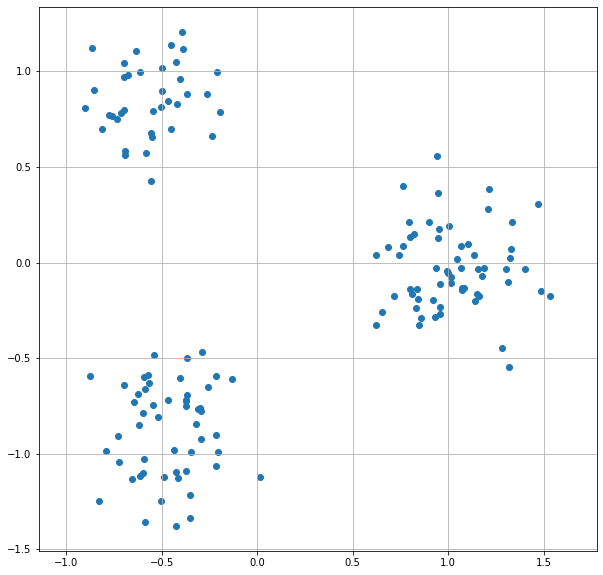

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1])
plt.axis('equal')
plt.grid()
plt.show()

Генотипом бота будет 3 пары координат, каждая из которых это кандидаты на координаты центров 3х наших кластеров.

In [ ]:
class Points_Class_GA(Main_Class_GA):
    def __init__(self, n, points, split=0.2, M=3, eps=0.1, k=1.):
        """
        n: число ботов в популяции
        M: число кластеров
        points - массив точек, которые надо распределить по кластерам размер (N, 2) - номер точки, x, y
        eps: - вероятность мутации
        k: - интенсивность мутации
        """
        super(Points_Class_GA, self).__init__(n, M*2, split=split)
        self.n = n
        self.M = M
        self.eps = eps
        self.k = k
        self.popul = np.random.normal(0, 1, (self.n, self.M, 2))
        self.point = points

    def loss(self, bot):
        value = 0.
        for i in range(self.point.shape[0]): # по всем точкам
            # Последовательно примеряем точку к каждому центру кластера
            min = 1e10
            for j in range(self.M): # вычисляем квадрат расстояния от точки i до центра кластера j.
                r2 = (bot[j, 0] - self.point[i, 0])**2 + (bot[j, 1] - self.point[i, 1])**2
                if r2 < min :
                    min = r2
            value += min
        return value/self.point.shape[0] # средний квадрат расстояния до ближайшего центра кластера

    def mutation(self):
        for i in range(self.nsurv, self.n):
            if np.random.random() < self.eps:
                self.popul[i] += self.k*np.random.normal(0, 1, (self.M, 2))

    def child(self, i, i1, i2):
        for j in range(self.M):
            if np.random.random() < 0.5:
                self.popul[i, j] = self.popul[i1, j]  
            else:
                self.popul[i, j] = self.popul[i2, j]
        return

In [ ]:
np.random.seed(3)

ga = Points_Class_GA(100, points, eps=0.5)
for ep in range(50):
    ga.evolution()
    print("ep=%d loss=%.3f" % (ep + 1, ga.val[0]))

ep=1 loss=0.205
ep=2 loss=0.205
ep=3 loss=0.137
ep=4 loss=0.137
ep=5 loss=0.137
ep=6 loss=0.137
ep=7 loss=0.137
ep=8 loss=0.137
ep=9 loss=0.137
ep=10 loss=0.137
ep=11 loss=0.137
ep=12 loss=0.137
ep=13 loss=0.137
ep=14 loss=0.137
ep=15 loss=0.137
ep=16 loss=0.137
ep=17 loss=0.137
ep=18 loss=0.137
ep=19 loss=0.137
ep=20 loss=0.137
ep=21 loss=0.137
ep=22 loss=0.137
ep=23 loss=0.137
ep=24 loss=0.137
ep=25 loss=0.137
ep=26 loss=0.137
ep=27 loss=0.137
ep=28 loss=0.137
ep=29 loss=0.137
ep=30 loss=0.137
ep=31 loss=0.137
ep=32 loss=0.137
ep=33 loss=0.137
ep=34 loss=0.137
ep=35 loss=0.137
ep=36 loss=0.137
ep=37 loss=0.137
ep=38 loss=0.137
ep=39 loss=0.137
ep=40 loss=0.137
ep=41 loss=0.137
ep=42 loss=0.137
ep=43 loss=0.137
ep=44 loss=0.137
ep=45 loss=0.137
ep=46 loss=0.137
ep=47 loss=0.137
ep=48 loss=0.137
ep=49 loss=0.137
ep=50 loss=0.137


In [ ]:
ga.popul[0] # Нулевой бот содержит координаты центров кластеров

array([[-0.7160258 ,  0.73146574],
       [ 1.23347104,  0.14898639],
       [-0.53058214, -0.73052664]])

In [ ]:
# Распределим точки по кластерам
x = [[], [], []] # три списка точек для каждого кластера
y = [[], [], []]
bot = ga.popul[0]
for i in range(N):
    min = 1e10
    n_class = None
    for j in range(M): # вычисляем квадрат расстояния от точки i до центра кластера j.
        r2 = (bot[j, 0] - points[i, 0])**2 + (bot[j, 1] - points[i, 1])**2
        if r2 < min :
            min = r2
            n_class = j
    x[n_class].append(points[i, 0])
    y[n_class].append(points[i, 1])




**Визуализация результатов**

Разделим разные кластеры выделив их разными цветами и формой( каждый кластер свой цвет и форма), обозначив их в легенде. 

Найденные центры кластеров отетим крестиками

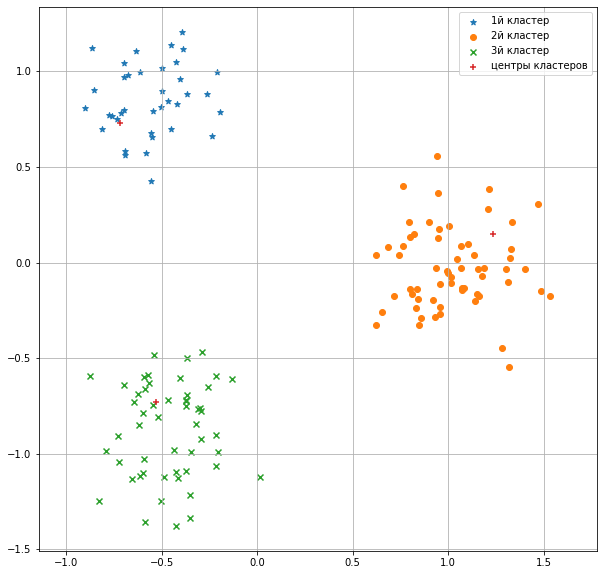

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x[0], y[0], marker='*', label="1й кластер")
plt.scatter(x[1], y[1], marker='o', label="2й кластер")
plt.scatter(x[2], y[2], marker='x', label="3й кластер")
plt.scatter(bot[:, 0], bot[:, 1], marker='+', label="центры кластеров")
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

**Выводы**:

Центы кластеров определились не очень точно, тем не менее, даже такой точности вполне достаточно для решения задачи правильной кластеризации точек.